In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("/Users/om/Desktop/My Mac/My_Assignment Data/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


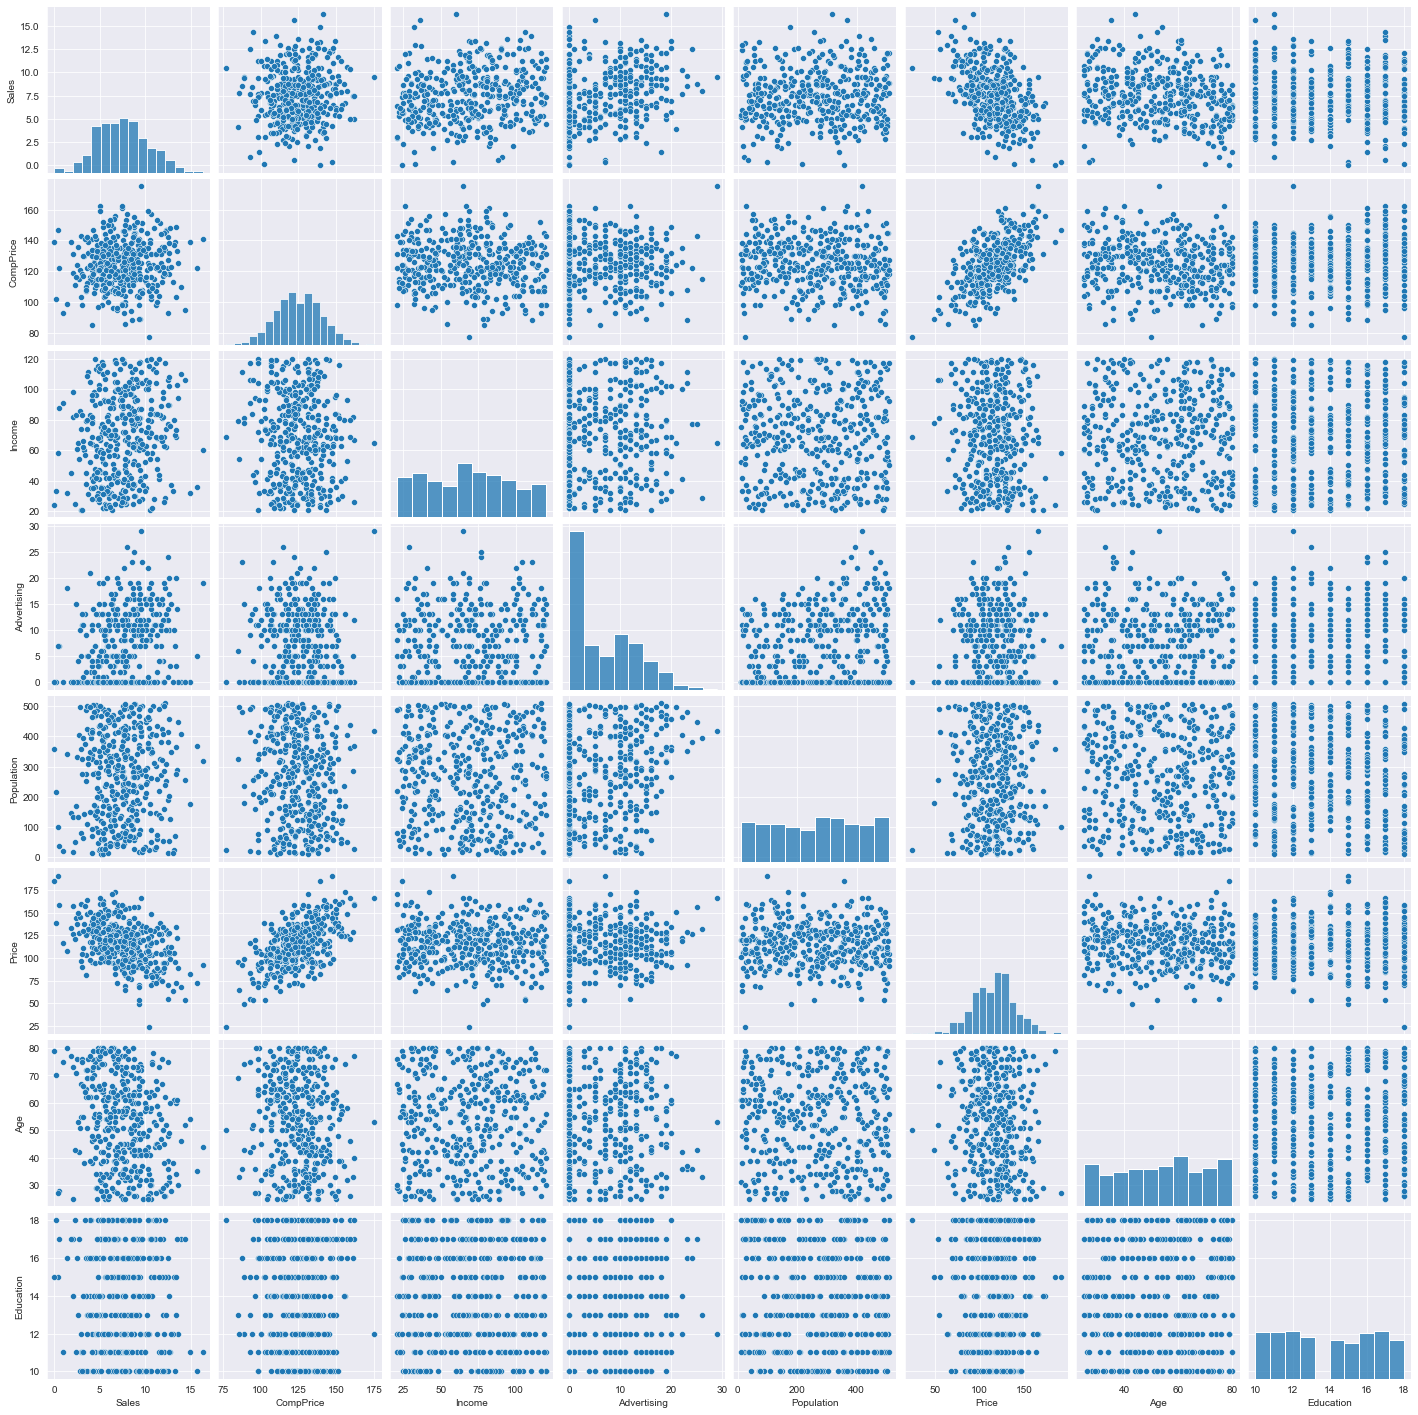

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

<AxesSubplot:>

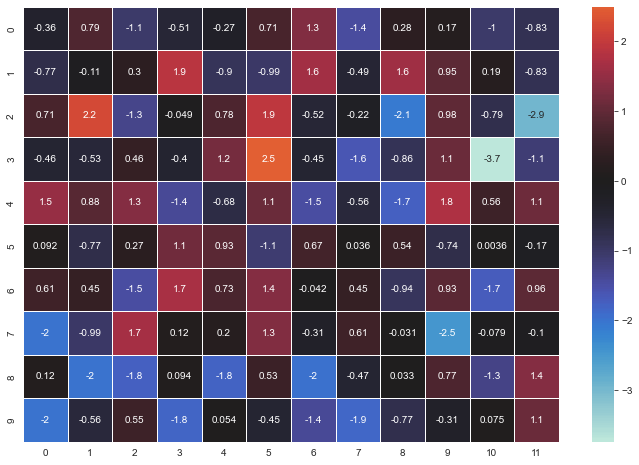

In [7]:
fig=plt.figure(figsize=(12,8))
normal_data = np.random.randn(10,12)
sns.heatmap(normal_data, center=0,annot=True, linewidths=.5)

In [8]:
df1=pd.Series(data['Sales'])
sales=[]
for i in df1:
    if i>8:
        sales.append('good')
    else: 
        sales.append('bad')
print(sales)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'ba

In [9]:
df2=pd.DataFrame(sales)
df3=pd.concat([df2,data],axis=1)
df3=df3.rename({0:'Output'},axis=1)
df3

,Output,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
data['High'] = data.Sales.map(lambda x: 1 if x > 8 else 0)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


# `Encoding the categorical columns by using Label Encoder`

In [11]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


# `Splitting the data into X and Y as input and output`

In [12]:
X = data.iloc[:,0:11]
Y = data['High']
X

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [13]:
data.High.value_counts()

0    236
1    164
Name: High, dtype: int64

##### `Inference: 236 sales value are less than 8 and 164 sales value are greater than 8`

In [14]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()

0.99

# <span style='background:yellow'> Random Forest by using splitting the data </span>

## `Splitting the data into train and test dataset`

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## `Building a model using Random Forest Classifier`

In [16]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

## `Fitting Random Forest Classifier`

In [17]:
RF.fit(x_train,y_train)
RF.estimators_ 
RF.classes_ 
RF.n_classes_ 
RF.n_features_  
RF.n_outputs_ 
RF.oob_score_  

0.996875

# `CrossTable on y_test`

In [18]:
preds = RF.predict(x_test)
crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,1
High,,
0,43,0
1,0,37


# `Final Model Accuracy` 

In [19]:
np.mean(preds==y_test)

1.0

# `Classification Report`

In [20]:
from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

